In [44]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (11, 7)

In [6]:
financial_features =  ['salary', 'deferral_payments', 'total_payments', 
                       'loan_advances', 'bonus', 'restricted_stock_deferred', 
                       'deferred_income', 'total_stock_value', 'expenses', 
                       'exercised_stock_options', 'other', 'long_term_incentive', 
                       'restricted_stock', 'director_fees']

email_features =  ['to_messages', 'email_address', 'from_poi_to_this_person', 
                   'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

label = ['poi']

data = pd.read_csv('enron_employees.csv', na_values='NaN')

In [22]:
fin_data = data[['full_name'] + financial_features]

In [37]:
print("Number of POIs:\t\t" + str(len(data[data.poi == True])))
print("Number of non-POIs:\t" + str(len(data[data.poi == False])))
print("Total number:\t\t" + str(len(data)))

Number of POIs:		18
Number of non-POIs:	127
Total number:		145


In [14]:
fin_data.describe()

,salary,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,exercised_stock_options,other,long_term_incentive,restricted_stock,director_fees
count,9.400000e+01,3.800000e+01,1.240000e+02,3.000000e+00,8.100000e+01,1.700000e+01,4.800000e+01,1.250000e+02,94.000000,1.010000e+02,9.200000e+01,6.500000e+01,1.090000e+02,16.000000
mean,2.840875e+05,8.416025e+05,2.623421e+06,2.797500e+07,1.201773e+06,6.218928e+05,-5.810498e+05,3.352073e+06,54192.010638,2.959559e+06,4.652767e+05,7.464912e+05,1.147424e+06,89822.875000
std,1.771311e+05,1.289323e+06,9.488106e+06,4.638256e+07,1.441679e+06,3.845528e+06,9.420764e+05,6.532883e+06,46108.377454,5.499450e+06,1.389719e+06,8.629174e+05,2.249770e+06,41112.700735
min,4.770000e+02,-1.025000e+05,1.480000e+02,4.000000e+05,7.000000e+04,-1.787380e+06,-3.504386e+06,-4.409300e+04,148.000000,3.285000e+03,2.000000e+00,6.922300e+04,-2.604490e+06,3285.000000
25%,2.118020e+05,7.964450e+04,3.863802e+05,1.200000e+06,4.250000e+05,-3.298250e+05,-6.112092e+05,4.941360e+05,22479.000000,5.067650e+05,1.209000e+03,2.750000e+05,2.520550e+05,83674.500000
50%,2.587410e+05,2.210635e+05,1.100246e+06,2.000000e+06,7.500000e+05,-1.402640e+05,-1.519270e+05,1.095040e+06,46547.500000,1.297049e+06,5.198450e+04,4.221580e+05,4.410960e+05,106164.500000
75%,3.086065e+05,8.672112e+05,2.084663e+06,4.176250e+07,1.200000e+06,-7.241900e+04,-3.792600e+04,2.606763e+06,78408.500000,2.542813e+06,3.575772e+05,8.318090e+05,9.850320e+05,112815.000000
max,1.111258e+06,6.426990e+06,1.035598e+08,8.152500e+07,8.000000e+06,1.545629e+07,-8.330000e+02,4.911008e+07,228763.000000,3.434838e+07,1.035973e+07,5.145434e+06,1.476169e+07,137864.000000


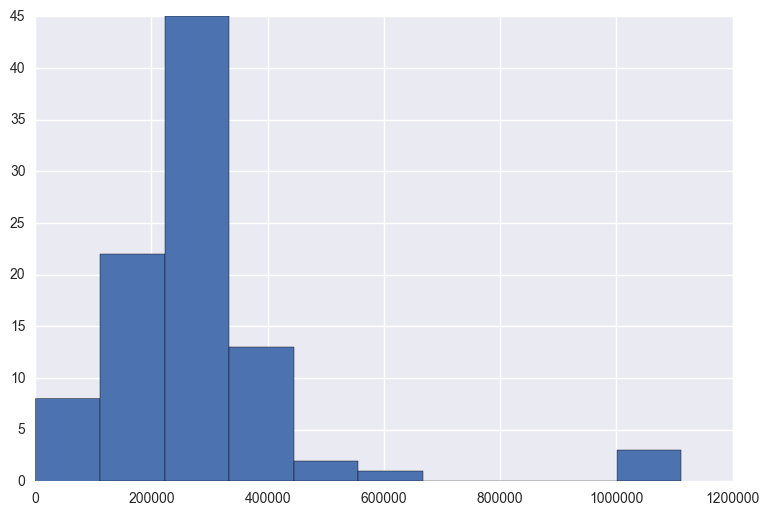

In [7]:
data.salary.hist()

In [12]:
data[data['salary'] > 700000][['full_name', 'salary', 'poi']]

,full_name,salary,poi
47,FREVERT MARK A,1060932.0,False
79,LAY KENNETH L,1072321.0,True
122,SKILLING JEFFREY K,1111258.0,True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b93b850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cf71b10>]], dtype=object)

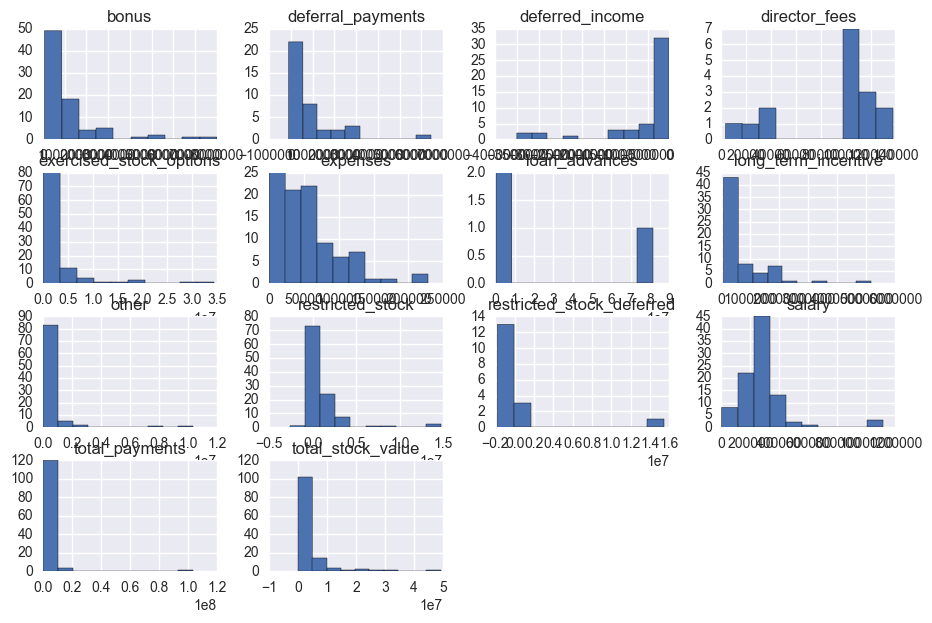

In [45]:
fin_data.hist()

In [18]:
fin_data.exercised_stock_options.describe()

count    1.010000e+02
mean     2.959559e+06
std      5.499450e+06
min      3.285000e+03
25%      5.067650e+05
50%      1.297049e+06
75%      2.542813e+06
max      3.434838e+07
Name: exercised_stock_options, dtype: float64

In [30]:
data[data.exercised_stock_options > 2.542813e+06][['full_name', 'exercised_stock_options','poi']].sort_values(by='exercised_stock_options', ascending=False)

,full_name,exercised_stock_options,poi
79,LAY KENNETH L,34348384.0,True
65,HIRKO JOSEPH,30766064.0,True
112,RICE KENNETH D,19794175.0,True
122,SKILLING JEFFREY K,19250000.0,True
103,PAI LOU L,15364167.0,False
47,FREVERT MARK A,10433518.0,False
32,DERRICK JR. JAMES V,8831913.0,False
143,YEAGER F SCOTT,8308552.0,True
35,DIMICHELE RICHARD G,8191755.0,False
110,REDMOND BRIAN L,7509039.0,False


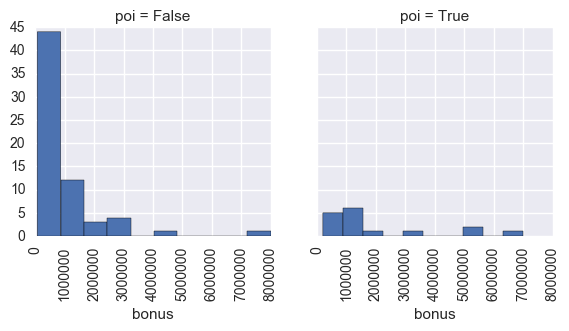

In [54]:
grid = sns.FacetGrid(data, col='poi')
grid.map(plt.hist, 'bonus')
grid.set_xticklabels(rotation=90)


In [51]:
plt.hist?